In [1319]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="seaborn", message="^internal gelsd")


In [1320]:
data_path = ("data/crime_2013.xls"
            )

crime_raw_2013 = pd.read_excel(data_path, header=4, skip_footer=3)

crime_raw_2013.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [1321]:
# rename columns
crime_raw_2013.columns = [
            'city', 'population', 'murder', 
            'violent_crime', 'rape1', 
            'rape2', 'robbery', 'agg_assault',
            'property_crime', 'burglary', 'larceny', 'gta', 'arson'
]

# set raw to df
df = crime_raw_2013

In [1266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
city              348 non-null object
population        348 non-null int64
murder            348 non-null int64
violent_crime     348 non-null int64
rape1             0 non-null float64
rape2             348 non-null int64
robbery           348 non-null int64
agg_assault       348 non-null int64
property_crime    348 non-null int64
burglary          348 non-null int64
larceny           348 non-null int64
gta               348 non-null int64
arson             187 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ KB


In [1267]:
# Drop rape1 column
df.drop(labels='rape1', axis=1, inplace=True)

In [1268]:
#count number of zeros in murder
df[df == 0].count()

city                0
population          0
murder             51
violent_crime     299
rape2             204
robbery           139
agg_assault        66
property_crime      6
burglary           21
larceny             7
gta                93
arson             133
dtype: int64

In [1269]:
# replace null values with 0
df.fillna(value=0, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city              348 non-null object
population        348 non-null int64
murder            348 non-null int64
violent_crime     348 non-null int64
rape2             348 non-null int64
robbery           348 non-null int64
agg_assault       348 non-null int64
property_crime    348 non-null int64
burglary          348 non-null int64
larceny           348 non-null int64
gta               348 non-null int64
arson             348 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


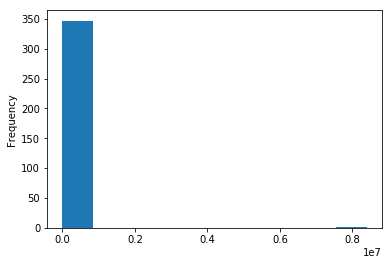

In [1270]:
df.population.plot.hist()
plt.show()

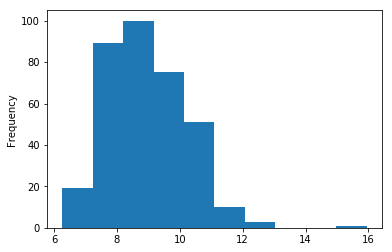

In [1271]:
np.log(df.population).plot.hist()
plt.show()

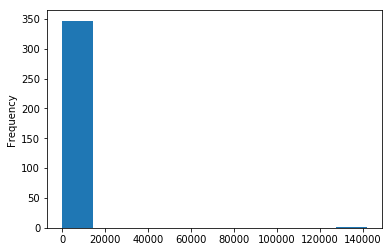

In [1272]:
df.property_crime.plot.hist()
plt.show()

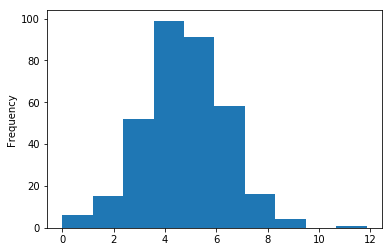

In [1273]:
np.log(df.property_crime[df.property_crime != 0]).plot.hist()
plt.show()

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [1274]:
# Create Features
features = pd.DataFrame([df.property_crime, df.population, df.population**2, df.murder, df.robbery]).T

features.columns = ['property_crime', 'population', 'population2', 'murder', 'robbery']
features.head()

,property_crime,population,population2,murder,robbery
0,12,1861,3463321,0,0
1,24,2577,6640929,3,0
2,16,2846,8099716,3,0
3,4090,97956,9595377936,791,227
4,223,6388,40806544,23,4


In [1275]:
# Encode Variables 
def zero(x):
    result = 0
    if x > 0:
        result = 1
    return result

features['murder'] = features.murder.apply(zero)
features['robbery'] = features.robbery.apply(zero)

features.head()

,property_crime,population,population2,murder,robbery
0,12,1861,3463321,0,0
1,24,2577,6640929,1,0
2,16,2846,8099716,1,0
3,4090,97956,9595377936,1,1
4,223,6388,40806544,1,1


In [1276]:
lr = linear_model.LinearRegression()
y = features.property_crime.values.reshape(-1, 1)
X = features.iloc[:,1:]

# Instantiate our model.
lr = linear_model.LinearRegression()

# Fit our model to our data.
lr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X, y))


Coefficients: 
 [[ 3.47652086e-02 -2.12376257e-09 -4.74211735e+01 -7.75916489e+01]]

Intercept: 
 [-79.93746352]

R-squared:
0.9961279337434973


In [1277]:
# add 1 to property crime
features['property_crime'] = features.property_crime + 1

In [1278]:
features['property_crime'] = np.log(features.property_crime)

In [1279]:
lr = linear_model.LinearRegression()
y = features.property_crime.values.reshape(-1, 1)
X = features.iloc[:,1:]

# Instantiate our model.
lr = linear_model.LinearRegression()

# Fit our model to our data.
lr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X, y))


Coefficients: 
 [[ 2.78592629e-05 -3.22057825e-12  1.29691839e+00  1.30473096e+00]]

Intercept: 
 [2.38221213]

R-squared:
0.7262270637962647


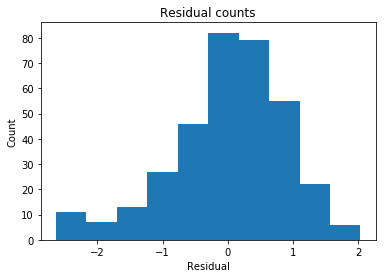

In [1280]:
# Extract predicted values.
predicted = lr.predict(X).ravel()
actual = features.property_crime

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

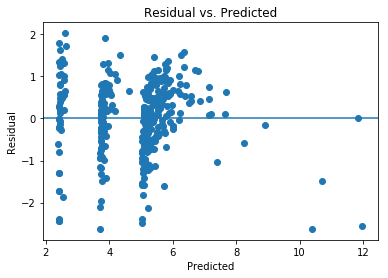

In [1281]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [1282]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population,population2,murder,robbery
population,1.000000,0.998264,0.034255,0.064371
population2,0.998264,1.000000,0.022352,0.043983
murder,0.034255,0.022352,1.000000,0.508127
robbery,0.064371,0.043983,0.508127,1.000000


In [1283]:
# Drop population squared
features = features.drop(['population2'], axis=1)

In [1284]:
lr = linear_model.LinearRegression()
y = features.property_crime.values.reshape(-1, 1)
X = features.iloc[:,1:]

# Instantiate our model.
lr = linear_model.LinearRegression()

# Fit our model to our data.
lr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X, y))


Coefficients: 
 [[8.28120676e-07 1.36837554e+00 1.78371419e+00]]

Intercept: 
 [2.46026117]

R-squared:
0.5680733920760448


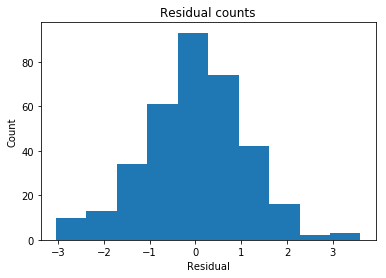

In [1285]:
# Extract predicted values.
predicted = lr.predict(X).ravel()
actual = features.property_crime

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

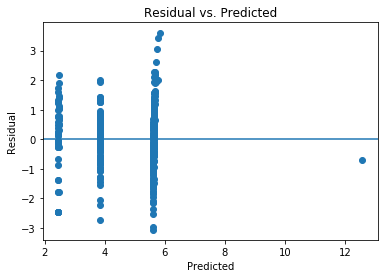

In [1286]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [1287]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form

linear_formula = 'property_crime ~ population+murder+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept     2.460261e+00
population    8.281207e-07
murder        1.368376e+00
robbery       1.783714e+00
dtype: float64

Intercept     1.987089e-42
population    1.556007e-09
murder        1.665764e-11
robbery       4.989737e-30
dtype: float64

0.5680733920760448

,0,1
Intercept,2.152840e+00,2.767683
population,5.656946e-07,0.000001
murder,9.820089e-01,1.754742
robbery,1.504312e+00,2.063116


# Add to model

In [1288]:
df[df == 0].count()

city                0
population          0
murder             51
violent_crime     299
rape2             204
robbery           139
agg_assault        66
property_crime      6
burglary           21
larceny             7
gta                93
arson             294
dtype: int64

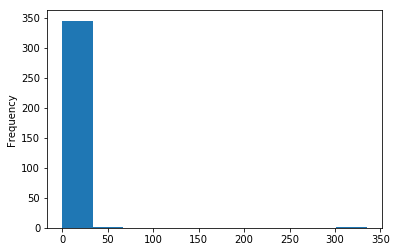

In [1289]:
df.violent_crime.plot.hist()
plt.show()

In [1290]:
# drop property crime

features = df.drop(['property_crime', 'city'], axis=1)
features.head()

,population,murder,violent_crime,rape2,robbery,agg_assault,burglary,larceny,gta,arson
0,1861,0,0,0,0,0,2,10,0,0.0
1,2577,3,0,0,0,3,3,20,1,0.0
2,2846,3,0,0,0,3,1,15,0,0.0
3,97956,791,8,30,227,526,705,3243,142,0.0
4,6388,23,0,3,4,16,53,165,5,0.0


In [1291]:
def getLog(x):
    result = 0
    if x > 0:
        result = np.log(x)
    return result
        
data = features.iloc[:, 1:].applymap(zero)
data['log_population'] = features.population.apply(getLog)
data['log_property_crime'] = df.property_crime.apply(getLog)

data.head()

,murder,violent_crime,rape2,robbery,agg_assault,burglary,larceny,gta,arson,log_population,log_property_crime
0,0,0,0,0,0,1,1,0,0,7.528869,2.484907
1,1,0,0,0,1,1,1,1,0,7.854381,3.178054
2,1,0,0,0,1,1,1,0,0,7.953670,2.772589
3,1,1,1,1,1,1,1,1,0,11.492274,8.316300
4,1,0,1,1,1,1,1,1,0,8.762177,5.407172


In [1292]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['log_property_crime'].values.reshape(-1, 1)
X = data.drop('log_property_crime', axis=1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.10716517 0.26492995 0.4923691  0.55384644 0.27866888 0.82047074
  1.61452056 0.31005642 0.20806583 0.71445779]]

Intercept: 
 [-5.19836246]

R-squared:
0.8750210407567414


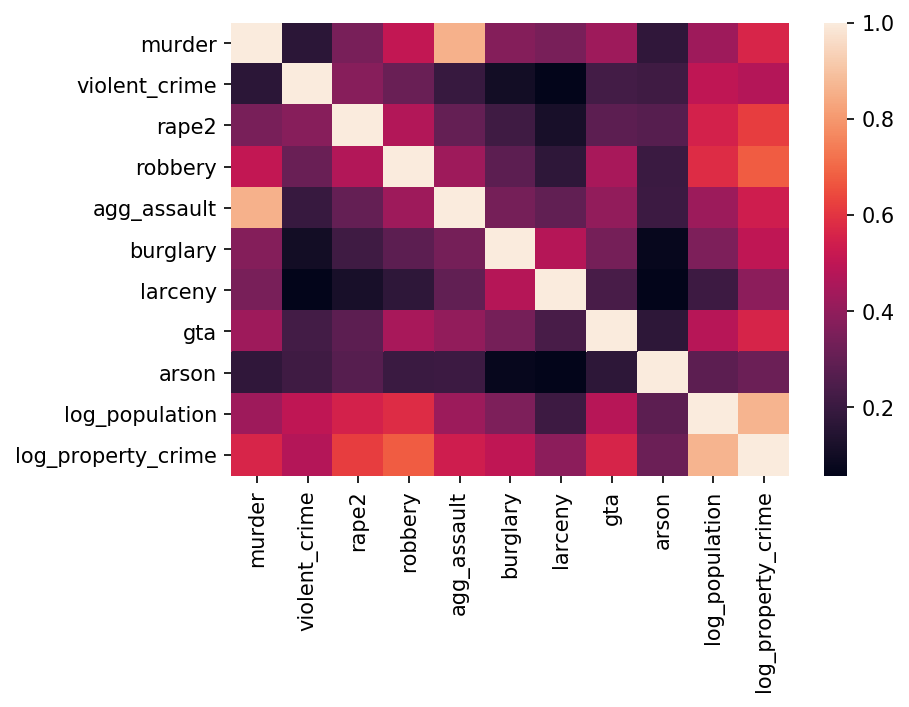

In [1293]:
correlation_matrix = data.corr()

ax = plt.figure(dpi=150)
ax = sns.heatmap(correlation_matrix)

plt.show()

In [1294]:
# Combine highly correlated features Robbery, agg_assault, murder
data['high_crimes'] = (data[['rape2', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder']] == 1).any(axis=1).astype(int)

data = data.drop(['rape2', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder'], axis=1)
data.head()

,violent_crime,arson,log_population,log_property_crime,high_crimes
0,0,0,7.528869,2.484907,1
1,0,0,7.854381,3.178054,1
2,0,0,7.953670,2.772589,1
3,1,0,11.492274,8.316300,1
4,0,0,8.762177,5.407172,1


In [1295]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['log_property_crime'].values.reshape(-1, 1)
X = data.drop('log_property_crime', axis=1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.30634989 0.34868918 1.07556583 2.62599458]]

Intercept: 
 [-7.60700319]

R-squared:
0.7927018225434452


In [1296]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'log_property_crime ~ violent_crime+arson+log_population+high_crimes'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [1297]:
lm.params

Intercept        -7.607003
violent_crime     0.306350
arson             0.348689
log_population    1.075566
high_crimes       2.625995
dtype: float64

In [1298]:
lm.pvalues

Intercept         2.857000e-49
violent_crime     3.183021e-02
arson             4.847984e-03
log_population    2.160680e-83
high_crimes       4.885900e-14
dtype: float64

In [1299]:
lm.rsquared

0.7927018225434452

In [1300]:
lm.conf_int()

,0,1
Intercept,-8.464249,-6.749757
violent_crime,0.026784,0.585916
arson,0.106807,0.590571
log_population,0.994436,1.156696
high_crimes,1.969185,3.282804


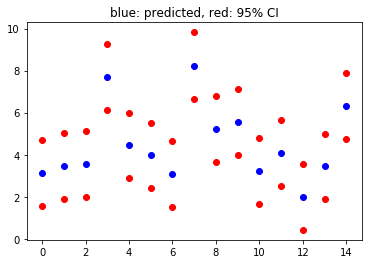

In [1301]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

# Try dropping violent_crime

In [1302]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'log_property_crime ~ arson+log_population+high_crimes'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept        -7.904130
arson             0.371436
log_population    1.117577
high_crimes       2.585778
dtype: float64

Intercept          1.288209e-55
arson              2.755113e-03
log_population    3.906747e-100
high_crimes        1.323026e-13
dtype: float64

0.7898942255970522

,0,1
Intercept,-8.721653,-7.086608
arson,0.129175,0.613697
log_population,1.045700,1.189454
high_crimes,1.926536,3.245020


# Cross Validate against massachusetts data

In [1304]:
data_path = ("data/masscrime_2013.xls"
            )

crime_raw = pd.read_excel(data_path, header=4, skip_footer=3)

crime_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Abington,16121,48,0,5.0,NaN,7,36,297,82,201,14,1.0
1,Acton,22871,8,0,1.0,NaN,2,5,178,31,144,3,0.0
2,Acushnet,10362,19,0,2.0,NaN,0,17,74,27,40,7,2.0
3,Adams,8352,21,0,3.0,NaN,3,15,157,40,109,8,1.0
4,Agawam,28659,41,0,12.0,NaN,3,26,270,105,130,35,1.0


In [1305]:
crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 13 columns):
City                                    279 non-null object
Population                              279 non-null int64
Violent
crime                           279 non-null int64
Murder and
nonnegligent
manslaughter    279 non-null int64
Rape
(revised
definition)1              269 non-null float64
Rape
(legacy
definition)2               10 non-null float64
Robbery                                 279 non-null int64
Aggravated
assault                      279 non-null int64
Property
crime                          279 non-null int64
Burglary                                279 non-null int64
Larceny-
theft                          279 non-null int64
Motor
vehicle
theft                     279 non-null int64
Arson3                                  269 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 28.4+ KB


In [1306]:
crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 13 columns):
City                                    279 non-null object
Population                              279 non-null int64
Violent
crime                           279 non-null int64
Murder and
nonnegligent
manslaughter    279 non-null int64
Rape
(revised
definition)1              269 non-null float64
Rape
(legacy
definition)2               10 non-null float64
Robbery                                 279 non-null int64
Aggravated
assault                      279 non-null int64
Property
crime                          279 non-null int64
Burglary                                279 non-null int64
Larceny-
theft                          279 non-null int64
Motor
vehicle
theft                     279 non-null int64
Arson3                                  269 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 28.4+ KB


In [1307]:
# set raw to df
df = crime_raw

# rename columns
df.columns = [
            'city', 'population',
            'violent_crime', 'murder', 'rape1', 
            'rape2', 'robbery', 'agg_assault',
            'property_crime', 'burglary', 'larceny', 'gta', 'arson'
]

In [1308]:
# Drop rape2 column
df.drop(labels='rape2', axis=1, inplace=True)

In [1309]:
#count number of zeros in murder
df[df == 0].count()

city                0
population          0
violent_crime       8
murder            243
rape1              67
robbery            83
agg_assault        12
property_crime      0
burglary            1
larceny             0
gta                31
arson             143
dtype: int64

In [1310]:
# replace null values with 0
df.fillna(value=0, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 12 columns):
city              279 non-null object
population        279 non-null int64
violent_crime     279 non-null int64
murder            279 non-null int64
rape1             279 non-null float64
robbery           279 non-null int64
agg_assault       279 non-null int64
property_crime    279 non-null int64
burglary          279 non-null int64
larceny           279 non-null int64
gta               279 non-null int64
arson             279 non-null float64
dtypes: float64(2), int64(9), object(1)
memory usage: 26.2+ KB


In [1311]:
features = df.drop(['property_crime', 'city'], axis=1)

features
features.head()

,population,violent_crime,murder,rape1,robbery,agg_assault,burglary,larceny,gta,arson
0,16121,48,0,5.0,7,36,82,201,14,1.0
1,22871,8,0,1.0,2,5,31,144,3,0.0
2,10362,19,0,2.0,0,17,27,40,7,2.0
3,8352,21,0,3.0,3,15,40,109,8,1.0
4,28659,41,0,12.0,3,26,105,130,35,1.0


In [1312]:
data = features.iloc[:, 1:].applymap(zero)

data['log_population'] = features.population.apply(getLog)
data.head()

,violent_crime,murder,rape1,robbery,agg_assault,burglary,larceny,gta,arson,log_population
0,1,0,1,1,1,1,1,1,1,9.687878
1,1,0,1,1,1,1,1,1,0,10.037625
2,1,0,1,0,1,1,1,1,1,9.245901
3,1,0,1,1,1,1,1,1,1,9.030256
4,1,0,1,1,1,1,1,1,1,10.263223


In [1313]:
data.columns

Index(['violent_crime', 'murder', 'rape1', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'arson', 'log_population'],
      dtype='object')

In [1314]:
# Combine highly correlated features Robbery, agg_assault, murder
data['high_crimes'] = (data[['rape1', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder']] == 1).any(axis=1).astype(int)

data = data.drop(['rape1', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder'], axis=1)

data['log_property_crime'] = df.property_crime.apply(getLog)
data.head()

,violent_crime,arson,log_population,high_crimes,log_property_crime
0,1,1,9.687878,1,5.693732
1,1,0,10.037625,1,5.181784
2,1,1,9.245901,1,4.304065
3,1,1,9.030256,1,5.056246
4,1,1,10.263223,1,5.598422


In [1315]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'log_property_crime ~ arson+log_population+high_crimes'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept        -3.087326
arson             0.429480
log_population    1.167443
high_crimes      -3.087326
dtype: float64

Intercept         6.279786e-52
arson             9.212103e-09
log_population    1.177059e-97
high_crimes       6.279786e-52
dtype: float64

0.8501503749633608

,0,1
Intercept,-3.407772,-2.766880
arson,0.286817,0.572144
log_population,1.097695,1.237191
high_crimes,-3.407772,-2.766880


In [1316]:
linear_formula = 'log_property_crime ~ log_population+high_crimes'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept        -3.411761
log_population    1.256215
high_crimes      -3.411761
dtype: float64

Intercept          3.128254e-59
log_population    5.667428e-109
high_crimes        3.128254e-59
dtype: float64

0.8310817218364077

,0,1
Intercept,-3.731583,-3.091939
log_population,1.189228,1.323202
high_crimes,-3.731583,-3.091939


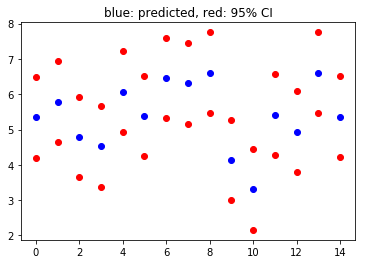

In [1168]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

# Cross Validate new model on k-folds of original data

In [1366]:
df = crime_raw_2013
df.head()

,city,population,murder,violent_crime,rape1,rape2,robbery,agg_assault,property_crime,burglary,larceny,gta,arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [1367]:
df = df.drop('rape1', axis=1)

In [1368]:
df.fillna(value=0, inplace=True)

In [1369]:
# Create Binary
features = df.drop(['city', 'population', 'property_crime'], axis=1).applymap(zero)

# Combine highly correlated features Robbery, agg_assault, murder
features['high_crimes'] = (df[['rape2', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder']] == 1).any(axis=1).astype(int)

features = features.drop(['rape2', 'robbery', 'agg_assault',
       'burglary', 'larceny', 'gta', 'murder', 'violent_crime'], axis=1)

features['log_property_crime'] = df.property_crime.apply(getLog)
features['log_population'] = df.population.apply(getLog)
features.head()

,arson,high_crimes,log_property_crime,log_population
0,0,0,2.484907,7.528869
1,0,1,3.178054,7.854381
2,0,1,2.772589,7.953670
3,0,0,8.316300,11.492274
4,0,0,5.407172,8.762177


In [1372]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = features.drop(['log_property_crime'], axis=1)
target = features.log_property_crime

reg = linear_model.LinearRegression()
reg.fit(data, target)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))


With 20% Holdout: 0.7335166105761874
Testing on Sample: 0.753983142441703


In [1374]:
linear_formula = 'log_property_crime ~ arson+log_population+high_crimes'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept        -5.750384
arson             0.359780
log_population    1.164936
high_crimes      -0.075895
dtype: float64

Intercept         4.918556e-42
arson             7.623552e-03
log_population    2.203049e-95
high_crimes       4.328342e-01
dtype: float64

0.753983142441703

,0,1
Intercept,-6.473457,-5.027312
arson,0.096140,0.623419
log_population,1.086645,1.243228
high_crimes,-0.265991,0.114201


In [1376]:
linear_formula = 'log_property_crime ~ arson+log_population'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

display(lm.params, lm.pvalues, lm.rsquared, lm.conf_int())

Intercept        -5.849448
arson             0.370960
log_population    1.171907
dtype: float64

Intercept         2.620814e-47
arson             5.650895e-03
log_population    5.886545e-99
dtype: float64

0.7535421334240502

,0,1
Intercept,-6.528230,-5.170667
arson,0.108961,0.632960
log_population,1.095631,1.248184


In [1395]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = features.drop(['log_property_crime', 'high_crimes'], axis=1)
target = features.log_property_crime

reg = linear_model.LinearRegression()
reg.fit(data, target)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.7558364115916268
Testing on Sample: 0.7535421334240502


Final Linear Formula:

$$ log(Property Crime) = \alpha + arson + log(Population)$$
    